In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import seaborn as sb
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#make variable for today's date
today = date.today()
todays_date=today.strftime("%b-%d-%Y")


In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

# Perform API Calls¶
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
# List of city data
city_df = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_df.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cabedelo
Processing Record 2 of Set 1 | nikolskoye-na-cheremshane
City not found. Skipping...
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | wuchi
Processing Record 5 of Set 1 | sept-iles
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | chokurdakh
Processing Record 9 of Set 1 | karaul
City not found. Skipping...
Processing Record 10 of Set 1 | dingle
Processing Record 11 of Set 1 | cidreira
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | marrakesh
Processing Record 14 of Set 1 | jamnah
City not found. Skipping...
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 18 of Set 1 | pithoragarh
Processing Record 19 of Set 1 | kerema
Processing Record 20 

Processing Record 37 of Set 4 | humenne
Processing Record 38 of Set 4 | cervo
Processing Record 39 of Set 4 | college
Processing Record 40 of Set 4 | codrington
Processing Record 41 of Set 4 | ust-kuyga
Processing Record 42 of Set 4 | porto uniao
Processing Record 43 of Set 4 | athabasca
Processing Record 44 of Set 4 | udomlya
Processing Record 45 of Set 4 | plettenberg bay
Processing Record 46 of Set 4 | kalabo
Processing Record 47 of Set 4 | batangafo
Processing Record 48 of Set 4 | bambanglipuro
Processing Record 49 of Set 4 | castro
Processing Record 0 of Set 5 | faanui
Processing Record 1 of Set 5 | hambantota
Processing Record 2 of Set 5 | jishou
Processing Record 3 of Set 5 | lompoc
Processing Record 4 of Set 5 | pemba
Processing Record 5 of Set 5 | nyrob
Processing Record 6 of Set 5 | tilichiki
Processing Record 7 of Set 5 | sinnamary
Processing Record 8 of Set 5 | nadym
Processing Record 9 of Set 5 | kununurra
Processing Record 10 of Set 5 | buluang
Processing Record 11 of Set

Processing Record 30 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 31 of Set 8 | krasnorechenskiy
Processing Record 32 of Set 8 | linqiong
Processing Record 33 of Set 8 | honningsvag
Processing Record 34 of Set 8 | bowen
Processing Record 35 of Set 8 | oussouye
Processing Record 36 of Set 8 | pisco
Processing Record 37 of Set 8 | omsukchan
Processing Record 38 of Set 8 | north bend
Processing Record 39 of Set 8 | susehri
Processing Record 40 of Set 8 | warqla
City not found. Skipping...
Processing Record 41 of Set 8 | diamantino
Processing Record 42 of Set 8 | chicama
Processing Record 43 of Set 8 | xichang
Processing Record 44 of Set 8 | katha
City not found. Skipping...
Processing Record 45 of Set 8 | keti bandar
Processing Record 46 of Set 8 | sumbe
Processing Record 47 of Set 8 | jiuquan
Processing Record 48 of Set 8 | kushmurun
Processing Record 49 of Set 8 | union hidalgo
Processing Record 0 of Set 9 | upernavik
Processing Record 1 of Set 9 | bera
Processing R

Processing Record 19 of Set 12 | kitimat
Processing Record 20 of Set 12 | tigil
Processing Record 21 of Set 12 | namie
Processing Record 22 of Set 12 | chapais
Processing Record 23 of Set 12 | muros
Processing Record 24 of Set 12 | port pirie
Processing Record 25 of Set 12 | khani
Processing Record 26 of Set 12 | addi ugri
City not found. Skipping...
Processing Record 27 of Set 12 | niceville
Processing Record 28 of Set 12 | jiddah
City not found. Skipping...
Processing Record 29 of Set 12 | skegness
Processing Record 30 of Set 12 | orocue
Processing Record 31 of Set 12 | fort collins
Processing Record 32 of Set 12 | monte alegre
Processing Record 33 of Set 12 | lumberton
Processing Record 34 of Set 12 | surt
Processing Record 35 of Set 12 | kodinsk
Processing Record 36 of Set 12 | bardiyah
Processing Record 37 of Set 12 | matay
Processing Record 38 of Set 12 | chaohu
Processing Record 39 of Set 12 | clarence town
Processing Record 40 of Set 12 | birao
Processing Record 41 of Set 12 | 

In [7]:
city_df=pd.DataFrame(city_df)
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cabedelo,-6.98,-34.83,82.40,78,20,6.93,BR,1584485214
1,hobart,-42.88,147.33,71.01,49,100,10.29,AU,1584485214
2,wuchi,29.38,103.02,37.33,72,52,2.26,CN,1584485215
3,sept-iles,50.20,-66.38,27.00,92,90,16.11,CA,1584485120
4,qaanaaq,77.48,-69.36,-19.86,59,98,6.06,GL,1584485215


In [8]:
#drop rows with null values
city_df=city_df.dropna()

In [9]:
city_df.head(30)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cabedelo,-6.98,-34.83,82.40,78,20,6.93,BR,1584485214
1,hobart,-42.88,147.33,71.01,49,100,10.29,AU,1584485214
2,wuchi,29.38,103.02,37.33,72,52,2.26,CN,1584485215
3,sept-iles,50.20,-66.38,27.00,92,90,16.11,CA,1584485120
4,qaanaaq,77.48,-69.36,-19.86,59,98,6.06,GL,1584485215
5,vaini,-21.20,-175.20,77.00,94,75,10.29,TO,1584485216
6,chokurdakh,70.63,147.92,-7.10,92,100,14.79,RU,1584485216
7,dingle,11.00,122.67,77.63,79,22,12.24,PH,1584485217
8,cidreira,-30.18,-50.21,73.58,79,96,22.35,BR,1584485217
9,lebu,-37.62,-73.65,57.31,83,0,8.19,CL,1584485217


In [10]:
#write contents of dataframe to a csv
city_df.to_csv("CityData.csv",encoding='utf-8', index=False)
#check data types of the contents of DataFrame
city_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

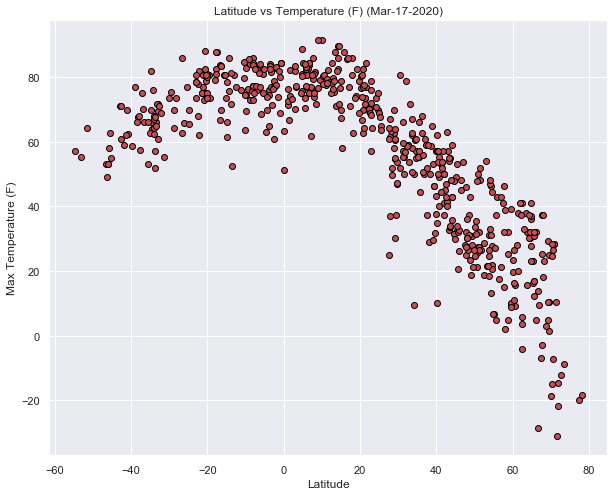

In [11]:
#plot Latitude vs. Temperature 
plt.figure(figsize=(10,8))
sb.set()
plt.scatter(city_df["Lat"], city_df["Max Temp"], color='r', edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Latitude vs Temperature (F) ({todays_date})")
plt.savefig("LatVsTemp.png")
plt.show()

This graph is showing a peak of temperature at the equator. The temperature decreases when you go either North or South from that point. 

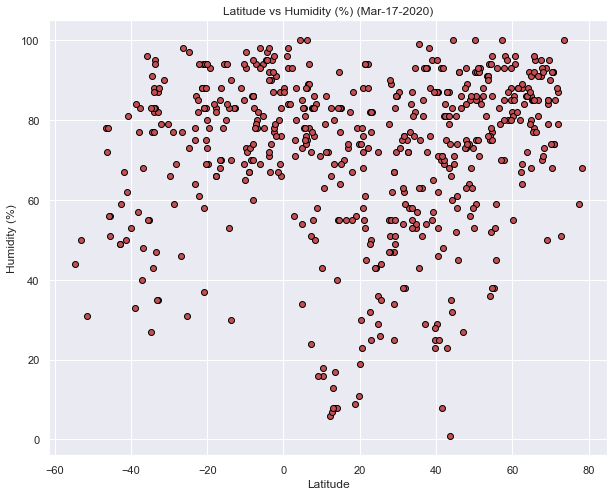

In [12]:
#plot Latitude vs. Humidity Plot
plt.figure(figsize=(10,8))
sb.set()
plt.scatter(city_df["Lat"], city_df["Humidity"], color='r', edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude vs Humidity (%) ({todays_date})")
plt.savefig("LatVsHumidity.png")
plt.show()

There is a higher concentration of data plots at the equator that are in the higher values of Humidity. In fact, there are no data points below 60% humidity at the equator, while the spread is fairly great in either direction.  

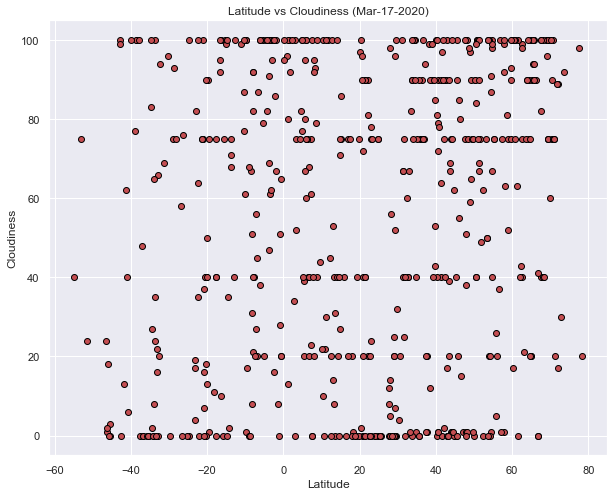

In [27]:
# Plot Latitude vs. Cloudiness
plt.figure(figsize=(10,8))
sb.set()
plt.scatter(city_df["Lat"], city_df["Cloudiness"], color='r', edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Latitude vs Cloudiness ({todays_date})")
plt.savefig("LatVsCloudiness.png")
plt.show()

There seems to be little to no correlation between latitude and cloudiness. There isn't a clear pattern that I'm able to ascertain from this data. 

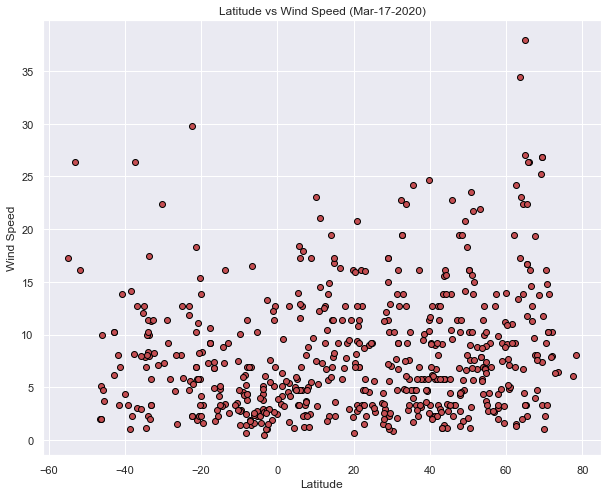

In [14]:
# Plot Latitude vs. Wind Speed 
plt.figure(figsize=(10,8))
sb.set()
plt.scatter(city_df["Lat"], city_df["Wind Speed"], color='r', edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Latitude vs Wind Speed ({todays_date})")
plt.savefig("LatVsWind_Speed.png")
plt.show()


There are peaks on either end of the x-axis, illustrating that higher wind speeds are found in the northernmost and southernmost parts of the world. 

In [16]:
#split data into northern and southern hemispheres
condition1=city_df["Lat"]>=0
condition2=city_df["Lat"]<0
northern_hemisphere=city_df[condition1]
southern_hemisphere=city_df[condition2]

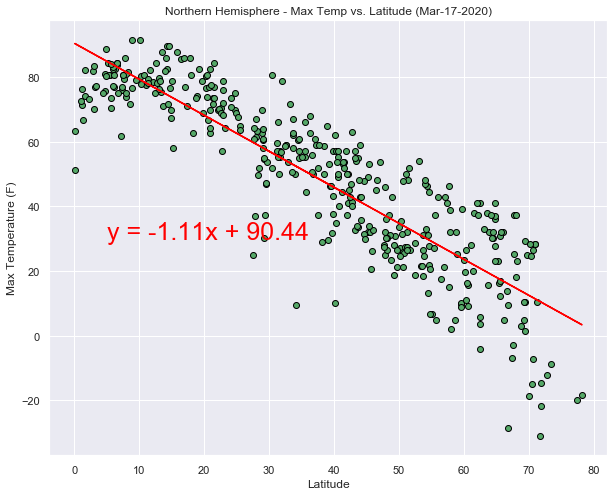

In [17]:
#Plot Northern Hemisphere - Temperature (F) vs. Latitude
nh_slope, nh_int, nh_r, nh_p, nh_std_err = st.linregress(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
nh_fit = nh_slope * northern_hemisphere["Lat"] + nh_int
line_eq = "y = " + str(round(nh_slope,2)) + "x + " + str(round(nh_int,2))
plt.figure(figsize=(10,8))
sb.set()
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"], color='g', edgecolor="black")
plt.plot(northern_hemisphere["Lat"],nh_fit, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(line_eq, (5,30), fontsize=25,color="red")
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude ({todays_date})")
plt.savefig("LatVsTemp_NH.png")

plt.show()

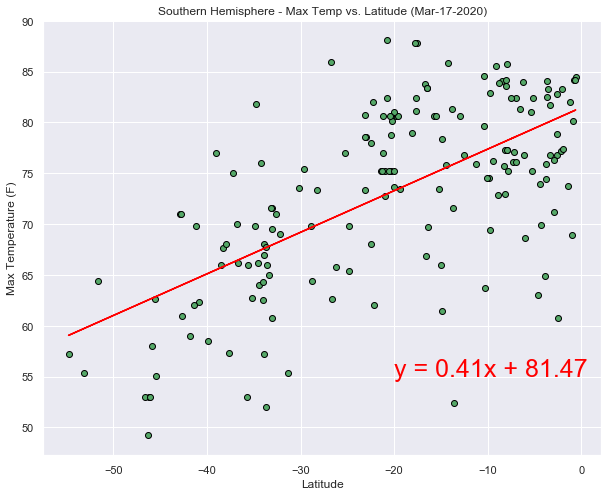

In [18]:
#Plot Southern Hemisphere - Max Temp vs. Latitude Linear Regression
sh_slope, sh_int, sh_r, sh_p, sh_std_err = st.linregress(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])
sh_fit = sh_slope * southern_hemisphere["Lat"] + sh_int
line_eq = "y = " + str(round(sh_slope,2)) + "x + " + str(round(sh_int,2))
plt.figure(figsize=(10,8))
sb.set()
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"], color='g', edgecolor="black")
plt.plot(southern_hemisphere["Lat"],sh_fit, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(line_eq, (-20,55), fontsize=25,color="red")
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude ({todays_date})")
plt.savefig("LatVsTemp_SH.png")

plt.show()


As we would expect, both of these graphs are showing an increase in temperature as you reach the equator. 

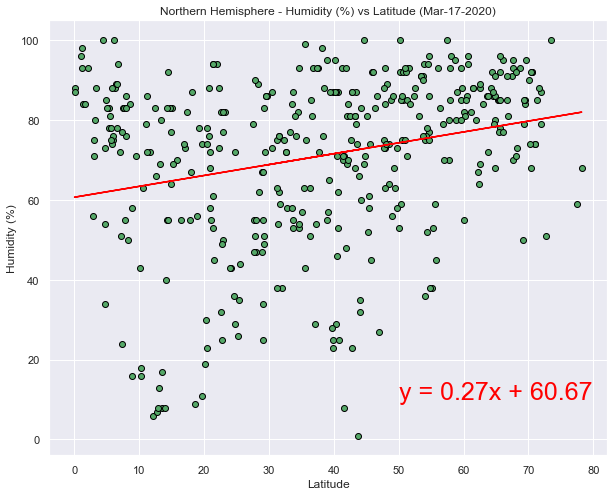

In [19]:
# Plot Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
nh_slope, nh_int, nh_r, nh_p, nh_std_err = st.linregress(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
nh_fit = nh_slope * northern_hemisphere["Lat"] + nh_int
line_eq = "y = " + str(round(nh_slope,2)) + "x + " + str(round(nh_int,2))
plt.figure(figsize=(10,8))
sb.set()
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Humidity"], color='g', edgecolor="black")
plt.plot(northern_hemisphere["Lat"],nh_fit, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq, (50,10), fontsize=25,color="red")
plt.title(f"Northern Hemisphere - Humidity (%) vs Latitude ({todays_date})")
plt.savefig("LatVsHumidity_NH.png")

plt.show()

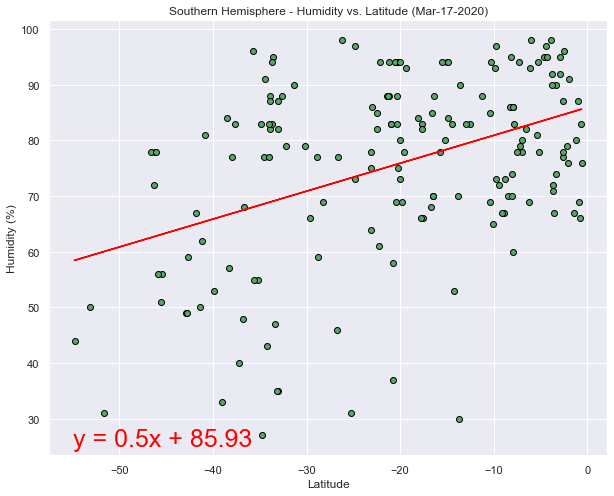

In [20]:
#Plot Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
sh_slope, sh_int, sh_r, sh_p, sh_std_err = st.linregress(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
sh_fit = sh_slope * southern_hemisphere["Lat"] + sh_int
line_eq = "y = " + str(round(sh_slope,2)) + "x + " + str(round(sh_int,2))
plt.figure(figsize=(10,8))
sb.set()
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Humidity"], color='g', edgecolor="black")
plt.plot(southern_hemisphere["Lat"],sh_fit, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq, (-55,25), fontsize=25,color="red")
plt.title(f"Southern Hemisphere - Humidity vs. Latitude ({todays_date})")
plt.savefig("LatVsHumidity_SH.png")

plt.show()


This pair puzzles me a bit. I would have thought that both would illustrate an increase in humidity the closer you get to the equator. However the graph for the northern hemisphere is showing the opposite--humidity decreases as you approach the equator. I'd be interested into drilling down into this information a little bit more and seeing exactly what cities this is plotting. Are there unseasonably warm conditions for this time of year?

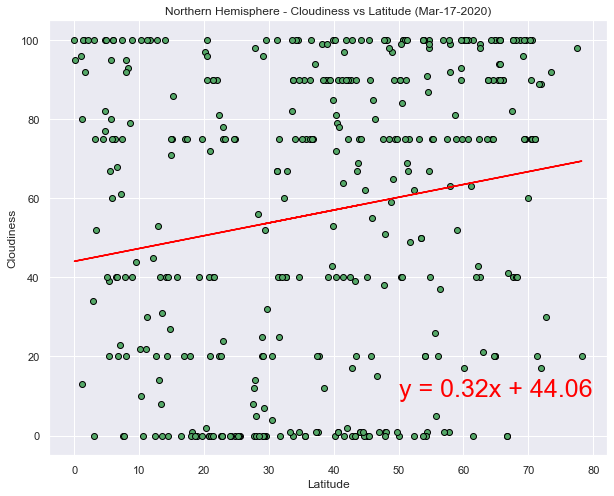

In [21]:
#Plot Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
nh_slope, nh_int, nh_r, nh_p, nh_std_err = st.linregress(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
nh_fit = nh_slope * northern_hemisphere["Lat"] + nh_int
line_eq = "y = " + str(round(nh_slope,2)) + "x + " + str(round(nh_int,2))
plt.figure(figsize=(10,8))
sb.set()
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"], color='g', edgecolor="black")
plt.plot(northern_hemisphere["Lat"],nh_fit, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (50,10), fontsize=25,color="red")
plt.title(f"Northern Hemisphere - Cloudiness vs Latitude ({todays_date})")
plt.savefig("LatVsCloudiness_NH.png")

plt.show()

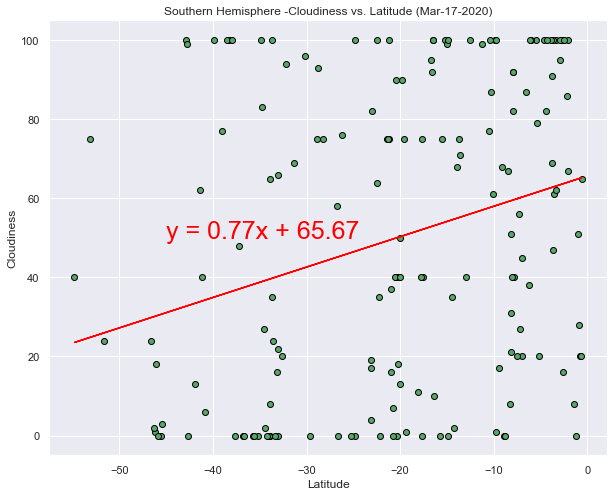

In [24]:
#Plot Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
sh_slope, sh_int, sh_r, sh_p, sh_std_err = st.linregress(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
sh_fit = sh_slope * southern_hemisphere["Lat"] + sh_int
line_eq = "y = " + str(round(sh_slope,2)) + "x + " + str(round(sh_int,2))
plt.figure(figsize=(10,8))
sb.set()
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"], color='g', edgecolor="black")
plt.plot(southern_hemisphere["Lat"],sh_fit, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (-45,50), fontsize=25,color="red")
plt.title(f"Southern Hemisphere -Cloudiness vs. Latitude ({todays_date})")
plt.savefig("LatVsCloudiness_SH.png")

plt.show()


Again, this pair is confusing, as they both show positive linear regression. Which seems to illustrate cloudiness increases as you travel further north in the northern hemisphere, and decreases as you travel further south in the southern hemisphere. 

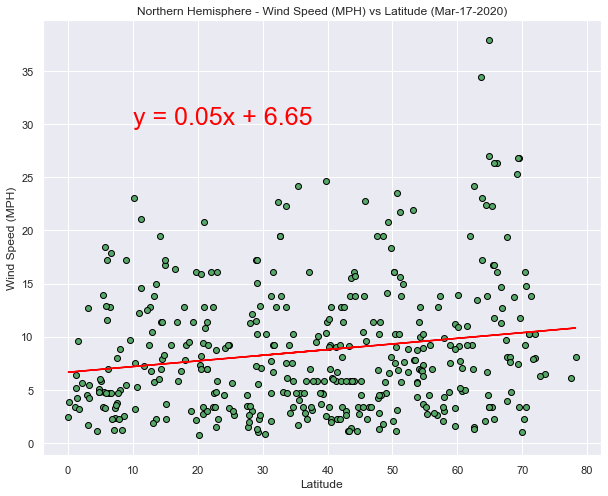

In [25]:
#Plot Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
nh_slope, nh_int, nh_r, nh_p, nh_std_err = st.linregress(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
nh_fit = nh_slope * northern_hemisphere["Lat"] + nh_int
line_eq = "y = " + str(round(nh_slope,2)) + "x + " + str(round(nh_int,2))
plt.figure(figsize=(10,8))
sb.set()
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"], color='g', edgecolor="black")
plt.plot(northern_hemisphere["Lat"],nh_fit, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.annotate(line_eq, (10,30), fontsize=25,color="red")
plt.title(f"Northern Hemisphere - Wind Speed (MPH) vs Latitude ({todays_date})")
plt.savefig("LatVsWind_Speed_NH.png")

plt.show()

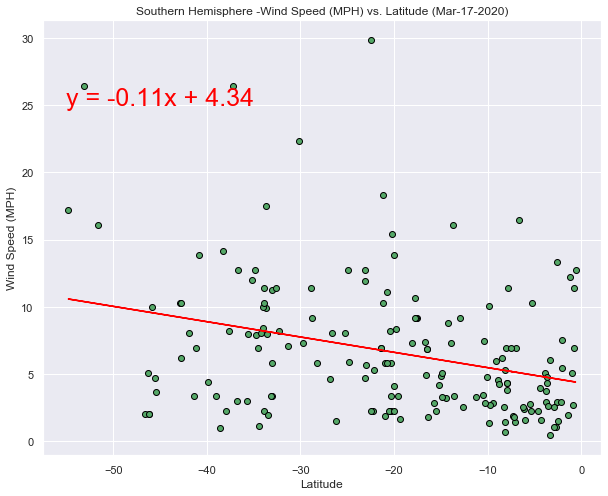

In [26]:
#Plot Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
sh_slope, sh_int, sh_r, sh_p, sh_std_err = st.linregress(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
sh_fit = sh_slope * southern_hemisphere["Lat"] + sh_int
line_eq = "y = " + str(round(sh_slope,2)) + "x + " + str(round(sh_int,2))
plt.figure(figsize=(10,8))
sb.set()
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"], color='g', edgecolor="black")
plt.plot(southern_hemisphere["Lat"],sh_fit, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.annotate(line_eq, (-55,25), fontsize=25,color="red")
plt.title(f"Southern Hemisphere -Wind Speed (MPH) vs. Latitude ({todays_date})")
plt.savefig("LatVsWind_Speed_SH.png")

plt.show()


As fits our intitial findings, Wind speed is decreasing as you approach the equator. 